<h1><center>Case Study 4: Cherry Blossom Race</center></h1>
<h3><center>Steven Cocke, Hannah Kosinovsky, Tanvi Arora</center></h3>
<h3><center>September 21st, 2019</center></h3>

<h3><center>Abstract</center></h3>

In this era of web, there is tremendous potential in seeking out data that can be analyzed. A lot of data is freely available. These freely accessible data may provide us with insights to our questions of personal interest or professional work. With the amount of data available over the web, it opens a lot fo possibilities and the only thing limiting one from using it is the ability to access it. 
Most of the data available on web is in unstructured format(HTML) and Webscraping is a technique that can help convert this data into structured format which can then become usable. 

## 1 Introduction

The Cherry Blossom started in 1973 as a training run for elite runners who were planning to compete in the Boston Marathon. It has since grown in popularity and in 2012
nearly 17,000 runners ranging in age from 9 to 89 participated. The race has become so
popular that entrants are chosen via a lottery or they guarantee a spot by raising $500
for an official race charity. After each year’s race, the organizers publish the results at
http://www.cherryblossom.org/

As part of this case study we performed web-scraping to read the files for the female runners and then processed them to perform Data Cleaning and Reformatting of variables, to create a data frame for analysis

## 2 Methods

The publicly available race results from the Cherry Blossom Ten Mile Run can be scraped
from the Web and read into R for analysis. The currently published results include all
years from 1999 to 2012. The task of scraping the Web site and formatting the results in a
way that can be analyzed in R is a bit challenging because the information reported and
the format of this information changes from year to year.
<a id='webscrapemethods'></a>

1 - Scrap simple Web pages for text content. Data is scraped from web for all years from 1999 to 2012 into individual files for each year.   

<a href="#webscrape">Web scraping</a>

**Observations :**
On inspecting the source of the web pages:
- Year 2000 data was enclosed in html tag `<FONT>` , all others are enclosed in html tag `<PRE>`  
- Year 1999 data had line delimiter as '\n' , all other year data had line delimiter as '\r\n'
- All the files have a header record separator starting with "====" but year 2001 , Women's Result does not have a header record. While extracting data, header and separator record from Men's Result for the year 2001 is hard-coded for Women's Result since they match. 
-  Analyzing header records of all year data
    - Year 1999 , 2007 , 2008 , 2012 have Time field  
    - Year 2011 has Time and net Time  
    -  All other year data have Gun Time and Net Time fields 
- Header records from different files have different names(font wise) but they are similar, so regular expressions is used and data has been collected for fields - "name", "home", "ag", "gun","net", "time"
    


<a id='datacleanmethods'></a>

2 - Use of regular expressions to extract and clean messy data from pre-formatted text tables  

<a href="#dataclean">Data Cleaning and Reformatting Variables</a>

**Observations* :**

- **_Cleaning Age Variable_**
    - There are a few N/As in the data extracted for age. It was found that some of them were header and footer records that were either blank or started with specific values like #, * . 
    - Even afer removing such records, there are still few N/As, but on analyzing the records for those years, it was found that age value were missing . These have been left as null to be imputed later as per requirement.

    <a href="#nullage">Valid Records with missing Age value</a>

|Fig. 1 Count of Null age records before processing . | Fig. 2 Count of Valid missing age records after processing |
|:---------------------------------------------------:|:---------------------------------------------------------:|
|![all_null](./images/all_null_age.png) | ![valid_null](./images/valid_null_Age.png) |



<a id='datacleanmethodstime'></a>
    
- **_Converting Time_**

    - Time is stored as a string in the format hh:mm:ss. Time is converted into minutes i.e. hh*60 + mm + ss/60
    - As observed during web scraping, different fiels have different fields that record Time. Since the results having Gun Time were the official records, Time value is picked up with a order preference of Gun Time , Net Time and Time fields  
    
    <a href="#createtime">Creation of Time Variable</a>
    

|Fig. 3 Count of records with missing value in Time  . | Fig. 4 Count of records with missing value in derived runTime field |
|:---------------------------------------------------:|:---------------------------------------------------------:|
|![all_null](./images/nabasedontime.png) | ![valid_null](./images/nabasedonruntime.png) |





## 3  Results

- **Age variable**

    
   ![age_small](./images/age_small.png)
   
        

<h4><center>Fig. 5 shows box plot of age vs year created showed that year 2003 and 2006 had very young runners. Lower quartile being as low as 2 yrs. On analyzing the data it was found that the data for age in these years had shifted to right by 1, hence the actual value being picked up was just the tenth position of age.</center></h4>

![age_correct](./images/age_correct.png)

<h4><center> Fig. 6 shows box plot of age vs year with data that looks corrected. Lower quartile for all years being around 28 and upper wuartile around 41. </center></h4>
    
- **Time variable**

    - Analyzing the derived field runTime, the years for which Time and Net Time variable was available, show the lowest lower quartile values around 82 mins. 
    - Years where Gun Time was used showed slightly higher lower quartile value 
    - For the years 2009 and 2010, lower quartile value of RunTime was around 95 mins, which is higher than other years.
    - Minimum runTime was seen around 51 mins for the year 2005 and 2010 while maximum runTime was seen around 177 mins for the year 2004

![age_correct](./images/runtimevsyear.png)


<h4><center> Fig 7. Side-by-Side Boxplots of Women Runners' Run Time in mins vs Age. For all the years overall inter-quartile range was similar. </center></h4>


- **Women's Results Dataframe**

At the end dataframe **cbwomen** is created. Below are the details of the dataframe


![cbwomen](./images/cbwomen.png)


<h4><center> Fig 8. Women's results Dataframe consists of 75971 rows and 6 columns. Above figure displays the stucture of the dataframe</center></h4>

## 4 Conclusions

Webscraping is a very useful way of gathering data for analysis. It is very important to analyze the source of webpages to get the format of data being fetched. If the data is added to the web over the years, it is most likely to contain format changes.These need to be manuallly analyzed and taken care of . If the data is a lot , using summary views and visualizations would help to identify the anomalies in different web pages.

Since web sources could contain a lot of data, ffter the data is fetched , it should  be analyzed and subsets of data that are required could be collected. 

## 5 References

Nolan, Deborah. Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving (Chapman & Hall/CRC The R Series) ("Part 2: Modeling Runners’ Times in the Cherry Blossom Race"). CRC Press. Kindle Edition. 

The data was scraped from the website: 
http://cherryblossom.org/aboutus/results_list.php

## 6 Code
<a id='Code'></a>

In [46]:
library(XML)
library(stringr)
library(here)

here() starts at /Users/tanviarora/Documents/SMU/Assignments/MSDS 7333 - QTW/RCaseStudies/CaseStudy4


<a id='webscrape'></a>
<a href="#webscrapemethods">Back to Top</a>
### Web Scraping Women Results

In [47]:
#all urls from womens 10k results
womenURLs = 
  c("results/1999/cb99f.html", "results/2000/Cb003f.htm", "results/2001/oof_f.html",
    "results/2002/ooff.htm", "results/2003/CB03-F.HTM",
    "results/2004/women.htm", "results/2005/CB05-F.htm", 
    "results/2006/women.htm", "results/2007/women.htm", 
    "results/2008/women.htm", "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm", 
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm")
ubase = "http://www.cherryblossom.org/"
urls = paste(ubase, womenURLs, sep = "")

urls[1:3]
years = 1999:2012

[1] "http://www.cherryblossom.org/results/1999/cb99f.html"
[2] "http://www.cherryblossom.org/results/2000/Cb003f.htm"
[3] "http://www.cherryblossom.org/results/2001/oof_f.html"

In [48]:
#this gets all the tables from the above urls 
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/1999/cb99f.html",
           year = 1999, sex = "Women", file = NULL)
  {
    doc = htmlParse(url)
    
    if (year == 2000) {
      
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    
    else if (year == 1999 & sex == "Women") {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]   
    }     
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }

In [49]:
urls[6]

[1] "http://www.cherryblossom.org/results/2004/women.htm"

In [50]:
#use mapply with the function created to get all the tables together and then name each one by year
womenTables = mapply(extractResTable, url = urls, year = years)
names(womenTables) = years
sapply(womenTables, length)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2359 2169 2976 3338 3547 3907 4342 5445 5699 6405 8333 8863 9038 9737

In [7]:
#extractResTable(urls[1], year = 1999)  

womenTables$'2012'[-1:-8]


[1] "    1     1/2781       2 Jelliah Tinega         26 Kenya                  26:48   54:02  5:25 ! "
   [2] "    2     2/2781      24 Malika Mejdoub         29 Ethiopia               27:09   54:24  5:27 ! "
   [3] "    3     1/2228      22 Yihunlish Delelecha    30 Ethiopia               27:09   54:33  5:28 ! "
   [4] "    4     3/2781      14 Agnieszka Ciolek       26 Poland                 27:30   54:36  5:28 ! "
   [5] "    5     4/2781       4 Claire Hallissey       29 Arlington VA           27:30   54:37  5:28 ! "
   [6] "    6     5/2781       6 Stephanie Pezzullo     29 Charlotte NC           27:36   55:16  5:32 ! "
   [7] "    7     2/2228      12 Kristen Zaitz          32 Boulder CO             27:46   55:24  5:33 ! "
   [8] "    8     6/2781       8 Emily Harrison         26 Flagstaff AZ           27:38   56:04  5:37 ! "
   [9] "    9     3/2228      10 Kateryna Stetsenko     30 Ukraine                28:21   57:28  5:45 ! "
  [10] "   10     1/554       18 Colleen De Reuck       47 Boulder CO             28:52   58:14  5:50 ! "
  [11] "   11     7/2781     147 Caitlin Chrisman       26 Charlotte NC           29:19   58:38  5:52 ! "
  [12] "   12     8/2781     159 Andrea Garvue          27 Chevy Chase MD         39:36   58:50  5:53   "
  [13] "   13     9/2781      16 Christine Ramsey       29 Baltimore MD           29:14   59:38  5:58 ! "
  [14] "   14    10/2781     193 Dalena Custer          29 Charlotte NC           29:47   59:59  6:00 ! "
  [15] "   15    11/2781      46 Amanda Trotter         26 Arlington VA           39:53 1:00:01  6:01   "
  [16] "   16    12/2781   24385 Kaitlin Koplin         27 Washington DC          29:33 1:00:05  6:01 ! "
  [17] "   17    13/2781     181 Loring Crowley         28 Winston Salem NC       30:11 1:00:14  6:02 ! "
  [18] "   18     1/974      162 Peggy Yetman           43 Leesburg VA            30:11 1:00:22  6:03   "
  [19] "   19     1/1366      42 Lisa Thomas            36 Alexandria VA          30:11 1:00:22  6:03 ! "
  [20] "   20     4/2228     155 Renee High             30 Virginia Beach VA      30:11 1:00:33  6:04 ! "
  [21] "   21     2/1366     313 Sarah Flament          36 Poland OH              40:18 1:00:46  6:05   "
  [22] "   22     5/2228     178 Elizabeth Young        32 Washington DC          41:01 1:00:47  6:05   "
  [23] "   23     6/2228     163 Laura O'Hara           31 Alexandria VA          41:01 1:01:07  6:07   "
  [24] "   24    14/2781    2024 Lindsay Donaldson      26 Washington DC          40:59 1:01:11  6:08   "
  [25] "   25    15/2781     171 Susan Hendrick         26 Washington DC          30:49 1:01:21  6:09   "
  [26] "   26    16/2781     168 Katie O'Regan          27 Lebanon PA             30:02 1:01:21  6:09 ! "
  [27] "   27     1/974      180 Jillian Pollack        23 Arlington VA           31:03 1:01:47  6:11   "
  [28] "   28     2/974      165 Brenda Schrank         40 Winchester VA          30:42 1:01:48  6:11 ! "
  [29] "   29    17/2781     194 Michelle Hazelton      28 Charlotte NC           31:06 1:01:52  6:12 ! "
  [30] "   30     3/974      360 Yolanda Mercado Torres 42 Bayamon PR             30:48 1:02:11  6:14   "
  [31] "   31    18/2781     173 Wendi Robinson         25 Washington DC          31:06 1:02:12  6:14 ! "
  [32] "   32     7/2228     189 Anna Donlan            31 Waxhaw NC              31:06 1:02:20  6:14 ! "
  [33] "   33     2/974      318 Jillian Goodwin        22 Arlington VA                 1:02:21  6:15   "
  [34] "   34     1/397       20 Joan Samuelson         54 Freeport ME            30:53 1:02:27  6:15   "
  [35] "   35     8/2228     917 Megan McNew            33 Baltimore MD           30:49 1:02:28  6:15   "
  [36] "   36    19/2781      44 Michaela Courtney      28 Arlington VA           30:37 1:02:41  6:17 ! "
  [37] "   37     9/2228     196 Melissa Stellato       30 Windsor CT             31:02 1:02:42  6:17 ! "
  [38] "   38    20/2781    1005 Ashley Luna            28 Denver CO             

In [60]:
mainDir <- "."
subDir <- "WomenText"

if (file.exists(paste(mainDir, subDir, "/", sep = "/", collapse = "/"))) {
    cat("subDir exists in mainDir and is a directory")
} else if (file.exists(paste(mainDir, subDir, sep = "/", collapse = "/"))) {
    cat("subDir exists in mainDir but is a file")
    # you will probably want to handle this separately
} else {
    cat("subDir does not exist in mainDir - creating")
    dir.create(file.path(mainDir, subDir))
}

subDir exists in mainDir and is a directory

#### Download all year data into separate files

In [71]:
#write .txt files into folder WomenTxt and call each one by year
wfilenames = paste("./WomenText/", 1999:2012, ".txt", sep = "")
write(womenTables$'1999',wfilenames[1])
write(womenTables$'2000',wfilenames[2])
write(womenTables$'2001',wfilenames[3])
write(womenTables$'2002',wfilenames[4])
write(womenTables$'2003',wfilenames[5])
write(womenTables$'2004',wfilenames[6])
write(womenTables$'2005',wfilenames[7])
write(womenTables$'2006',wfilenames[8])
write(womenTables$'2007',wfilenames[9])
write(womenTables$'2008',wfilenames[10])
write(womenTables$'2009',wfilenames[11])
write(womenTables$'2010',wfilenames[12])
write(womenTables$'2011',wfilenames[13])
write(womenTables$'2012',wfilenames[14])

#### Analysis of year 2012 data to get a general understanding of data

In [72]:
womenFiles = lapply(wfilenames, readLines)
names(womenFiles) = 1999:2012

#look at 2012 file to see how to extract variables from the text file
#first 8 lines are not part of the data
els = readLines("./WomenText/2012.txt")
els[1:10]

eqIndex = grep("^===", els)
eqIndex
first3 = substr(els,1,3)
which(first3 == "===")
spacerRow = els[eqIndex]
headerRow = els[eqIndex - 1]
body = els[-(1:eqIndex)]
head(body)

[1] ""                                                                                                
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                       
 [3] "                 Washington, DC     Sunday, April 1, 2012"                                       
 [4] ""                                                                                                
 [5] "               Female Official Results (Sorted By Net Time)"                                     
 [6] ""                                                                                                
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Pace  S "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ===== = "
 [9] "    1     1/2781       2 Jelliah Tinega         26 Kenya                  26:48   54:02  5:25 ! "
[10] "    2     2/2781      24 Malika Mejdoub         29 Ethiopia               27:09   54:24  5:27 ! "

[1] 8

[1] 8

[1] "    1     1/2781       2 Jelliah Tinega         26 Kenya                  26:48   54:02  5:25 ! "
[2] "    2     2/2781      24 Malika Mejdoub         29 Ethiopia               27:09   54:24  5:27 ! "
[3] "    3     1/2228      22 Yihunlish Delelecha    30 Ethiopia               27:09   54:33  5:28 ! "
[4] "    4     3/2781      14 Agnieszka Ciolek       26 Poland                 27:30   54:36  5:28 ! "
[5] "    5     4/2781       4 Claire Hallissey       29 Arlington VA           27:30   54:37  5:28 ! "
[6] "    6     5/2781       6 Stephanie Pezzullo     29 Charlotte NC           27:36   55:16  5:32 ! "

#### Analysis of year 2001 data since this presents a exception scenario

In [73]:
#look at 2012 file to see how to extract variables from the text file
#first 8 lines are not part of the data
els = readLines("./WomenText/2001.txt")
els[1:10]


#els[which(els!="")]
#eqIndex = grep("^[0-9]*", els)
#print("find eqIndex")
#eqIndex

which(str_trim(els)!="")[1]

[1] ""                                                                        
 [2] "                                                                 "       
 [3] "                      "                                                  
 [4] "    1  6002 Elana MEYER           34 Rep Of S.africa      52:15   52:16#"
 [5] "    2  6004 Lydia GRIGORIEVA      27 Russia               53:12   53:15#"
 [6] "    3  6019 Eyerusalem KUMA       20 Ethiopia             53:16   53:19#"
 [7] "    4  6007 Milena GLUSAC         25 Usa                  53:33   53:34#"
 [8] "    5  6012 Olga KOVPOTINA        31 Russia               54:01   54:03#"
 [9] "    6  6020 Merima HASHIM         20 Ethiopia             54:29   54:31#"
[10] "    7  6005 Jane OMORO            27 Kenya                55:05   55:08#"

[1] 4

In [74]:
#some of them are upper/ lower case in different files and we want them to be the same
headerRow = tolower(headerRow)

ageStart = regexpr('ag', headerRow)
ageStart

age = substr(body, start = ageStart, stop = ageStart +1)
head(age)

blankLocs = gregexpr(" ", spacerRow)
blankLocs

searchLocs = c(0,blankLocs[[1]])
searchLocs

Values = mapply(substr, list(body), start = searchLocs[-length(searchLocs)] + 1, stop = searchLocs[-1] - 1)
length(Values)

[1] 49
attr(,"match.length")
[1] 2
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[1] "26" "29" "30" "26" "29" "29"

[[1]]
 [1]  6 18 25 48 51 72 80 88 94 96
attr(,"match.length")
 [1] 1 1 1 1 1 1 1 1 1 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[1]  0  6 18 25 48 51 72 80 88 94 96

[1] 97290

In [120]:
#create function to find column locations
## This function will find the row that divides data from the header records
findColLocs = function(spacerRow) {
  
  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)
  
  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}


## This function will collect column positions of the required columns 
## from the header record of the file data
## Since different year data have different header records, regular expression is used 
selectCols = 
  function(colNames, headerRow, searchLocs) 
  {
    sapply(colNames, 
           function(name, headerRow, searchLocs)
           {
             startPos = regexpr(name, headerRow)[[1]]
             if (startPos == -1) 
               return( c(NA, NA) )
             
             index = sum(startPos >= searchLocs)
             c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
           },
           headerRow = headerRow, searchLocs = searchLocs )
  }



In [121]:
locs2012 <- findColLocs(spacerRow)
length(2012)
length(locs2012)
locs2012

ageLoc = selectCols("ag", headerRow, searchLocs)
ages = mapply(substr, list(body), start = ageLoc[1,], stop = ageLoc[2,])
summary(as.numeric(ages))



shortColNames = c("name", "home", "age", "gun", "net", "time")
locCols = selectCols(shortColNames, headerRow, searchLocs)
Values = mapply(substr, list(body), start = locCols[1,], stop = locCols[2,])
class(Values)

colnames(Values) = shortColNames
head(Values)
tail(Values)



[1] 1

[1] 8

[1]  0  6 12 34 37 56 64 72

Warning message in summary(as.numeric(ages)):
“NAs introduced by coercion”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   28.00   33.00   34.81   41.00   83.00       1 

[1] "matrix"

name                  home               age gun net     time
[1,] Lydia GRIGORIEVA      Russia             NA  NA    53:12 NA  
[2,] Eyerusalem KUMA       Ethiopia           NA  NA    53:16 NA  
[3,] Milena GLUSAC         Usa                NA  NA    53:33 NA  
[4,] Olga KOVPOTINA        Russia             NA  NA    54:01 NA  
[5,] Merima HASHIM         Ethiopia           NA  NA    54:29 NA  
[6,] Jane OMORO            Kenya              NA  NA    55:05 NA

name                  home               age gun net     time
[2967,] Joanna LANZIROTTI     Woodbridge VA      NA  NA  2:28:53 NA  
[2968,] Stephanie DANNEMILLER Arlington VA       NA  NA  2:18:34 NA  
[2969,] Alicia HOSMER         Bethesda MD        NA  NA  2:30:52 NA  
[2970,] Kathy OBERT           Alexandria VA      NA  NA  2:35:17 NA  
[2971,] Tonya MCCLARY         Fort Washington MD NA  NA  2:41:01 NA  
[2972,] F OPEN guideline    * er USATF Age-Group NA  NA  guideli NA

In [122]:
locs2001 <- findColLocs(spacerRow)
locs2001
els = readLines("./WomenText/2001.txt")

length(2001)
length(locs2001)
eqIndex = which(str_trim(els)!="")[1]
varNames =c("name", "home", "ag", "gun","net", "time")
    # Extract the two key rows and the data
    spacerRow = "===== ===== ===================== == ================== ======= ======="
    headerRow = tolower("PLACE NUM   NAME                  AG HOMETOWN           NET     GUN")
print(headerRow)
blankLocs = gregexpr(" ", spacerRow)
print("blankLocs")
blankLocs

searchLocs = c(0,blankLocs[[1]])
print("searchLocs")
searchLocs
body = els[ -(1 : eqIndex) ]

ageLoc = selectCols("ag", headerRow, searchLocs)
print("ageLoc")
print(ageLoc)
ages = mapply(substr, list(body), start = ageLoc[1,], stop = ageLoc[2,])
summary(as.numeric(ages))

shortColNames = c("name", "home", "age", "gun", "net", "time")
locCols = selectCols(shortColNames, headerRow, searchLocs)
print(locCols)
Values = mapply(substr, list(body), start = locCols[1,], stop = locCols[2,])
class(Values)

colnames(Values) = shortColNames
head(Values)
tail(Values)


[1]  0  6 12 34 37 56 64 72

[1] 1

[1] 8

[1] "place num   name                  ag hometown           net     gun"
[1] "blankLocs"


[[1]]
[1]  6 12 34 37 56 64
attr(,"match.length")
[1] 1 1 1 1 1 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[1] "searchLocs"


[1]  0  6 12 34 37 56 64

[1] "ageLoc"
     ag
[1,] 35
[2,] 36


Warning message in summary(as.numeric(ages)):
“NAs introduced by coercion”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   28.00   33.00   34.81   41.00   83.00       1 

     name home age gun net time
[1,]   13   38  NA  65  57   NA
[2,]   33   55  NA  NA  63   NA


[1] "matrix"

name                  home               age gun net     time
[1,] Lydia GRIGORIEVA      Russia             NA  NA    53:12 NA  
[2,] Eyerusalem KUMA       Ethiopia           NA  NA    53:16 NA  
[3,] Milena GLUSAC         Usa                NA  NA    53:33 NA  
[4,] Olga KOVPOTINA        Russia             NA  NA    54:01 NA  
[5,] Merima HASHIM         Ethiopia           NA  NA    54:29 NA  
[6,] Jane OMORO            Kenya              NA  NA    55:05 NA

name                  home               age gun net     time
[2967,] Joanna LANZIROTTI     Woodbridge VA      NA  NA  2:28:53 NA  
[2968,] Stephanie DANNEMILLER Arlington VA       NA  NA  2:18:34 NA  
[2969,] Alicia HOSMER         Bethesda MD        NA  NA  2:30:52 NA  
[2970,] Kathy OBERT           Alexandria VA      NA  NA  2:35:17 NA  
[2971,] Tonya MCCLARY         Fort Washington MD NA  NA  2:41:01 NA  
[2972,] F OPEN guideline    * er USATF Age-Group NA  NA  guideli NA

In [123]:
#create function that does above - extract relevant values 
# Year 2001 data does not have header record , it has been identified 
# by checking if the file has a row that does not start with "==="
extractVariables = 
  function(file)
  {
    ##I was trying to parse by the first row since there are no headers and then add that row back to the body
    ##with the body= call being altered
    if (length(grep("^===", file)) == 0) {
      eqIndex = which(str_trim(file)!="")[1]
      varNames =c("name", "home", "ag", "gun","net", "time")
    # Extract the two key rows and the data
    spacerRow = "===== ===== ===================== == ================== ======= ======="
    headerRow = tolower("PLACE NUM   NAME                  AG HOMETOWN           NET     GUN")
    body = file[ -(1 : eqIndex-1) ]
    }
    
    else {
    # Find the index of the row with =s
    eqIndex = grep("^===", file)
    varNames =c("name", "home", "ag", "gun","net", "time")
    # Extract the two key rows and the data
    spacerRow = file[eqIndex] 
    headerRow = tolower(file[ eqIndex - 1 ])
    body = file[ -(1 : eqIndex) ]
        
  }      
    
      # Obtain the starting and ending positions of variables
    searchLocs = findColLocs(spacerRow)
 
    locCols = selectCols(varNames, headerRow, searchLocs)

    Values = mapply(substr, list(body), start = locCols[1, ], 
                    stop = locCols[2, ])
  
    colnames(Values) = c("name", "home", "ag", "gun","net", "time")
    
  
    invisible(Values)
    
    
  }


In [124]:
womenResMat = lapply(womenFiles, extractVariables)

In [125]:
womenResMat[[3]][1:5,]

name                  home               ag gun     net     time
[1,] Elana MEYER           Rep Of S.africa    34   52:16   52:15 NA  
[2,] Lydia GRIGORIEVA      Russia             27   53:15   53:12 NA  
[3,] Eyerusalem KUMA       Ethiopia           20   53:19   53:16 NA  
[4,] Milena GLUSAC         Usa                25   53:34   53:33 NA  
[5,] Olga KOVPOTINA        Russia             31   54:03   54:01 NA

In [126]:
length(womenResMat)

sapply(womenResMat, nrow)

[1] 14

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2356 2167 2973 3335 3544 3899 4334 5437 5692 6397 8325 8855 9030 9729

<a id='dataclean'></a>
<a href="#datacleanmethods">Back to Top</a>
### Data Cleaning and Reformatting Variables

In [127]:
age = as.numeric(womenResMat[['2012']][ , 'ag'])

tail(age)

age = sapply(womenResMat,function(x) as.numeric(x[ , 'ag']))

[1] 39 40 31 55 40 38

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

null device 
          1

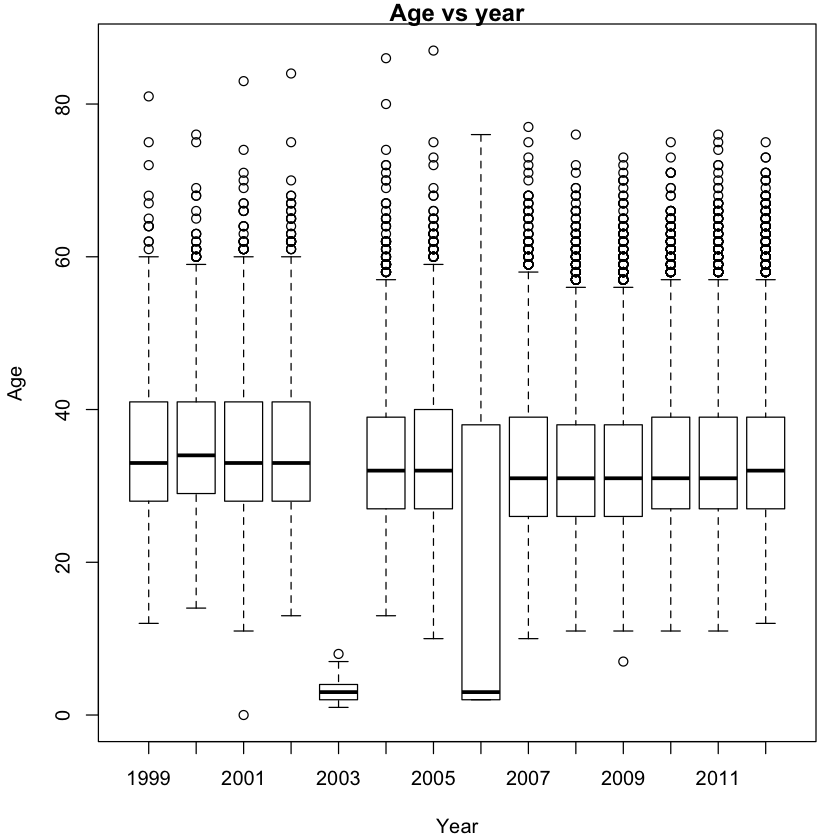

In [128]:
#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year", main = "Age vs year")

par(oldPar)
dev.off()

From above Box Plot of Age by Year , it was observed that the year 2003 and 2006 had lot of yound runners. Lets observe this data

In [129]:
summary(age[["2006"]])
head(womenFiles[["2003"]])
head(womenResMat[["2003"]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2.00    2.00    3.00   18.38   38.00   76.00       3 

[1] ""                                                                                             
[2] "Place Div /Tot  Num    Name                          Ag Hometown            Gun Tim  Net Tim "
[3] "===== ========= ===== ============================= == =================== =======  ======= " 
[4] "    1    1/2510  6014  Olga Romanova                 22  RUS                  53:43#   53:42 "
[5] "    2    2/2510  6004  Asha Gigi                     30  ETH                  53:49#   53:49 "
[6] "    3    3/2510  6003  Sylvia Mosqueda               36 Los Angeles CA        53:58#   53:57 "

name                          home                ag gun     net     time
[1,]  Olga Romanova                  RUS                2    53:4    53:4 NA  
[2,]  Asha Gigi                      ETH                3    53:4    53:4 NA  
[3,]  Sylvia Mosqueda               Los Angeles CA      3    53:5    53:5 NA  
[4,]  Jackline Torori                KEN                2    55:0    54:5 NA  
[5,]  Renata Paradowska              POL                3    55:2    55:2 NA  
[6,]  Hellen Kimaiyo-Kipkoske        KEN                3    56:1    56:1 NA

It is observed that for the year 2003 and 2006, only the tenth position of age was picked up , hence returning smaller values. selectCols function was modified to increase the length of the field by 1. Since it is blank, it was expected to have no issue

In [130]:
## This function will collect column positions of the required columns 
## from the header record of the file data
## Since different year data have different header records, regular expression is used 
selectCols = 
  function(colNames, headerRow, searchLocs) 
  {
    sapply(colNames, 
           function(name, headerRow, searchLocs)
           {
             startPos = regexpr(name, headerRow)[[1]]
             if (startPos == -1) 
               return( c(NA, NA) )
             
             index = sum(startPos >= searchLocs)
             c(searchLocs[index] + 1, searchLocs[index + 1] )
           },
           headerRow = headerRow, searchLocs = searchLocs )
  }



In [131]:
womenResMat = lapply(womenFiles, extractVariables)
age = sapply(womenResMat,function(x) as.numeric(x[ , 'ag']))

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

In [132]:
sapply(age,function(x) sum(is.na(x)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   4    1    1    5    2    0    9    3    4    0    4    2    0    0

From the above analysis, we can see that many of the years data have age value as NA. Although these do not form a high percentage we can look for a pattern , if it can be avoided.

null device 
          1

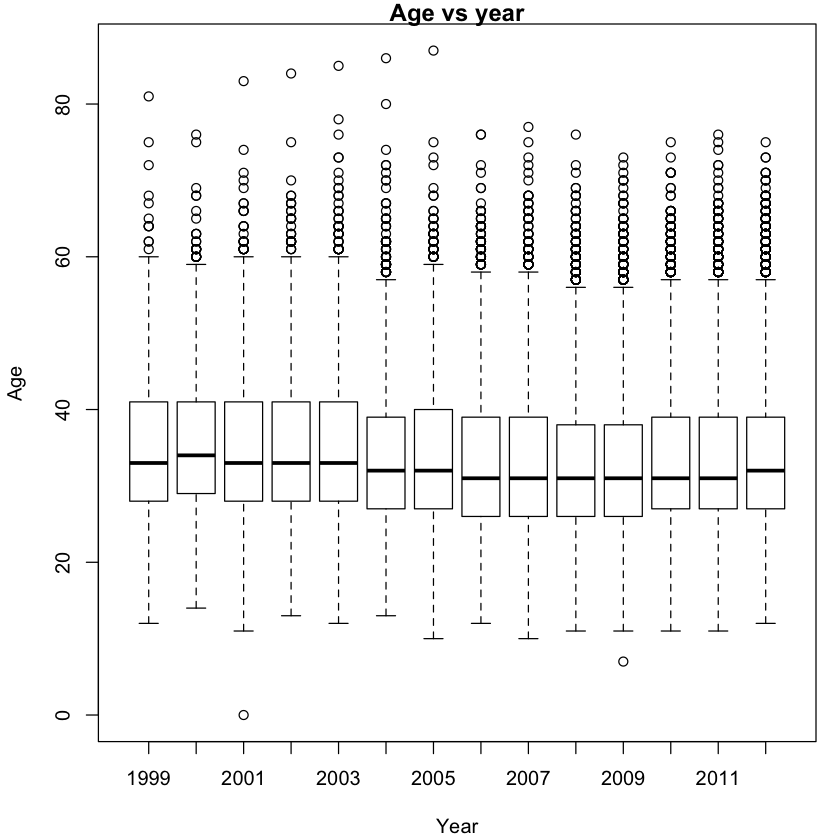

In [133]:
#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year", main = "Age vs year")

par(oldPar)
dev.off()

Box plot of age does not show any alarming age values. Lower quartile seems to be around 27-28 yrs and upper quartile around 41 yrs. There is 1 value that is entered as 0 yrs for the year 2001, but this could be an actual value. And since these are not many it is not concerning. 

<a id='nullage'></a>
<a href="#datacleanmethods">Back to Age Variable Observations</a>

In [134]:
#womenFiles[[1999]][which(womenFiles[[1999]])]
#womenFiles[["2005"]][1:10]

age2005=age[["2005"]]
naindex2005=which(is.na(age2005))
womenResMat[["2005"]][naindex2005,]

name                    home                ag  gun      net      time
 [1,] Ashley Griffin          Washington DC           1:15:21  1:15:04  NA  
 [2,] Lindsay Vogtsberger     Arlington VA            1:15:43  1:08:49  NA  
 [3,] Angelica Jimenez        Washington DC           1:28:35  1:21:25  NA  
 [4,] Runner Xxxii            Rockville MD            1:35:43  1:27:18  NA  
 [5,] Michelle Hinman                                 1:44:16  1:39:13  NA  
 [6,] Xandra Brandon          Washington DC           1:44:40  1:39:01  NA  
 [7,] Michelle Merola         Washington DC           1:52:03  1:45:15  NA  
 [8,] Nancy Samko             Coraopolis PA           2:03:53  1:57:36  NA  
 [9,]                                                                   NA

In [135]:
age2002=age[["2002"]]
naindex2002=which(is.na(age2002))
womenResMat[["2002"]][naindex2002,]

name                   home                ag  gun      net      time
[1,] Unknown RUNNER         Washington DC           1:19:45  1:18:59  NA  
[2,] Melissa AKEY           Washington DC           1:34:43  1:34:12  NA  
[3,] Yvonne BONNER          Alexandria VA           1:44:34  1:42:08  NA  
[4,] Unnamed Athlete        Unknown             XX  2:10:45  2:04:55  NA  
[5,] TF OPEN guideline    * der USATF Age-Group  Un ne        guideli NA

In [136]:
grep("^TF OPEN guideline*",womenResMat[["2002"]])

[1] 3335

In [137]:
womenResMat[["2002"]][3335,]

name                     home                       ag 
"TF OPEN guideline    *"    "der USATF Age-Group"                    " Un" 
                     gun                      net                     time 
                    "ne"               " guideli"                       NA

In [138]:
#Modify extractVariables function to remove rows that are footnotes
extractVariables = 
  function(file)
  {
    ##I was trying to parse by the first row since there are no headers and then add that row back to the body
    ##with the body= call being altered
    if (length(grep("^===", file)) == 0) {
      eqIndex = which(str_trim(file)!="")[1]
      varNames =c("name", "home", "ag", "gun","net", "time")
    # Extract the two key rows and the data
    spacerRow = "===== ===== ===================== == ================== ======= ======="
    headerRow = tolower("PLACE NUM   NAME                  AG HOMETOWN           NET     GUN")
    body = file[ -(1 : eqIndex-1) ]
    }
    
    else {
    # Find the index of the row with =s
    eqIndex = grep("^===", file)
    varNames =c("name", "home", "ag", "gun","net", "time")
    # Extract the two key rows and the data
    spacerRow = file[eqIndex] 
    headerRow = tolower(file[ eqIndex - 1 ])
    body = file[ -(1 : eqIndex) ]
        
  }      
    
    # Remove footnotes and blank rows
      footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
      if ( length(footnotes) > 0 ) body = body[ -footnotes ]
      blanks = grep("^[[:blank:]]*$", body)
      if (length(blanks) > 0 ) body = body[ -blanks ]
    
      footer1 = grep("^TF OPEN guideline*",body)
      if (length(footer1) > 0 ) body = body[ -footer1 ]
      
      footer2 = grep("^[[#|*]]*",body)
      if (length(footer2) > 0 ) body = body[ -footer2 ]
      # Obtain the starting and ending positions of variables
    searchLocs = findColLocs(spacerRow)
 
    locCols = selectCols(varNames, headerRow, searchLocs)

    Values = mapply(substr, list(body), start = locCols[1, ], 
                    stop = locCols[2, ])
  
    colnames(Values) = c("name", "home", "ag", "gun",
                         "net", "time")
    
  
    invisible(Values)
    
    
  }


In [139]:
womenResMat = lapply(womenFiles, extractVariables)
age = sapply(womenResMat,function(x) as.numeric(x[ , 'ag']))
sapply(age,function(x) sum(is.na(x)))

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   4    0    0    4    0    0    8    1    2    0    2    0    0    0

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

null device 
          1

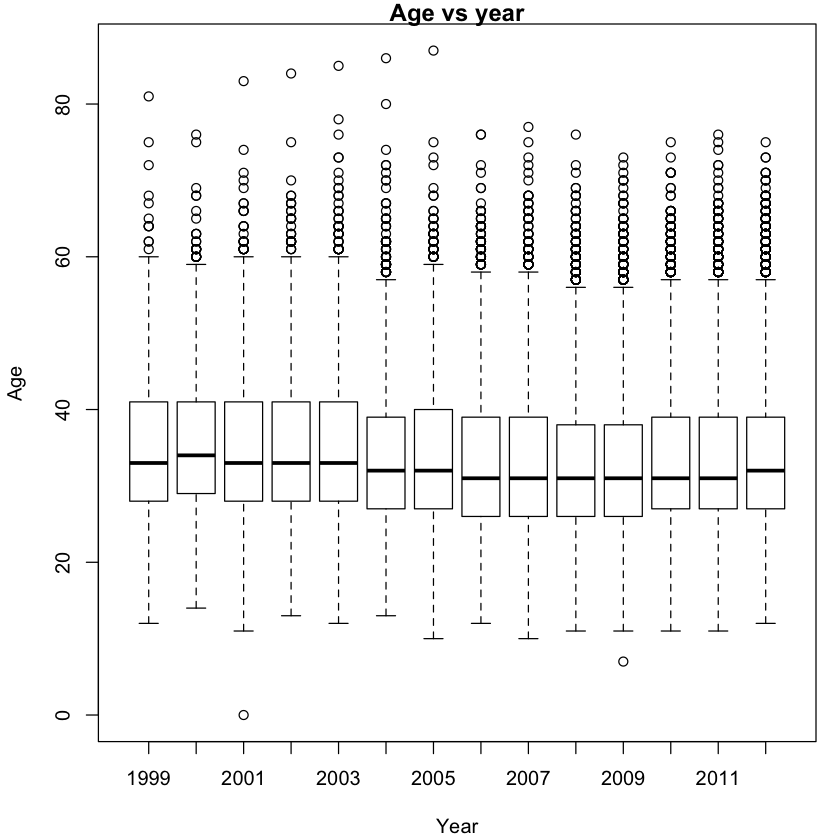

In [140]:
age = sapply(womenResMat,function(x) as.numeric(x[ , 'ag']))

oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year", main = "Age vs year")

par(oldPar)
dev.off()

In [141]:
age1999=age[["1999"]]
naindex1999=which(is.na(age1999))
womenResMat[["1999"]][naindex1999,]

name                   home                ag  gun net time    
[1,] Lidiya Grigoryeva      Russia                  NA  NA    53:40 
[2,] Gladys Asiba           Kenya                   NA  NA    54:50 
[3,] Connie Buckwalter      Lancaster PA            NA  NA    59:36 
[4,] Ann Reid               Bethesda MD             NA  NA  1:53:03

After removing foot notes and blanks we see therea re still a few null values for age. As was seen above for 2005 data and 1999 data , there are actual null age values and so , so it is decided to leave them as is and impute them later based on the use case.

<a id='createtime'></a>

<a href="#datacleanmethodstime">Back To Time Variable Observations</a>
#### Creation of time variable

In [142]:

charTime = womenResMat[['2012']][, 'time']
head(charTime, 5)

tail(charTime, 5)

timePieces = strsplit(charTime, ":")

timePieces[[1]]

tail(timePieces, 1)

timePieces = sapply(timePieces, as.numeric)

runTime = sapply(timePieces, 
                 function(x) {
                   if (length(x) == 2) x[1] + x[2]/60
                   else 60*x[1] + x[2] + x[3]/60
                 })

print("summary of runTime")
summary(runTime)

convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

[1] "  54:02 " "  54:24 " "  54:33 " "  54:36 " "  54:37 "

[1] "2:33:11 " "2:36:03 " "2:36:45 " "2:36:54 " "2:50:58 "

[1] "  54" "02 "

[[1]]
[1] "2"   "50"  "58 "

[1] "summary of runTime"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.03   89.08   98.03   99.02  107.90  170.97 

In [143]:
createDF = 
function(Res, year, sex) 
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, 'net']) )  
              Res[ , 'net']
            else if( !is.na(Res[1, 'gun']) ) 
               Res[ , 'gun']
            else 
               Res[ , 'time']

  runTime = convertTime(useTime)
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'],
                       home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

womenDF = mapply(createDF, womenResMat, year = 1999:2012,
               sex = rep("W", 14), SIMPLIFY = FALSE)

warnings()[ c(1:2, 49:50) ]




Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

NULL

In [144]:
sapply(womenDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5431  192    0  115  107    0    0

From above analysis, there are few years where the time field is having NAs. On looking at data from those years, it was seen that there are gun or net times available . From the headers in the files, it gun time was considered as official time, so to fetch time value, preference was given in the order of **'gun','net','time'**

In [145]:
## Final CreateDF function that takes care of above issues related
## different time variables available for different years data
createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}


In [146]:
womenDF = mapply(createDF, womenResMat, year = 1999:2012,
               sex = rep("W", 14), SIMPLIFY = FALSE)



Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
“NAs introduced by coercion”

In [147]:
sapply(womenDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

Above analysis show that NAs from time field have been resolved from our solution and all year data have the runTime

null device 
          1

[1] 75971     6

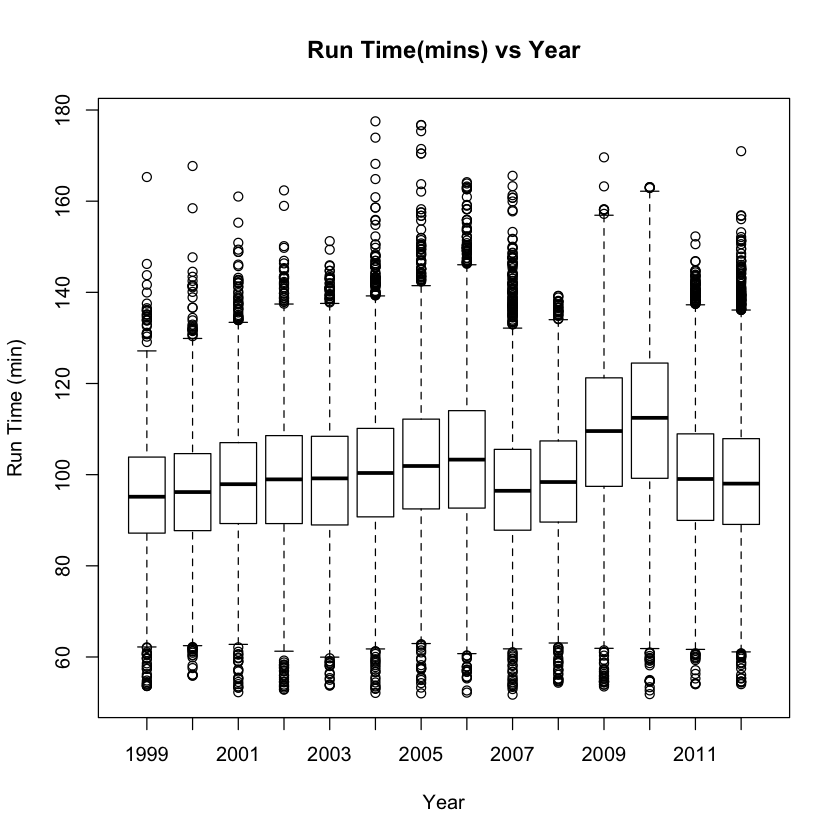

In [150]:
#pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(womenDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)",main="Run Time(mins) vs Year")
dev.off()

cbwomen = do.call(rbind, womenDF)
save(cbwomen, file = "cbwomen.rda")

dim(cbwomen)

In [149]:
head(womenDF[["1999"]])

year sex name                   home                age runTime 
1 1999 W   Jane Omoro             Kenya               26  53.61667
2 1999 W   Jane Ngotho            Kenya               29  53.63333
3 1999 W   Lidiya Grigoryeva      Russia              NA  53.66667
4 1999 W   Eunice Sagero          Kenya               20  53.91667
5 1999 W   Alla Zhilyayeva        Russia              29  54.13333
6 1999 W   Teresa Wanjiku         Kenya               24  54.16667

In [153]:
runTime = sapply(womenDF,function(x) as.numeric(x[ , 'runTime']))

In [154]:
summary(runTime[["2005"]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.02   92.48  101.90  102.59  112.18  176.72 

In [155]:
summary(runTime[["2010"]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  51.85   99.20  112.47  111.84  124.48  163.08 

In [156]:
summary(runTime[["2004"]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.12   90.74  100.37  100.97  110.15  177.52 

In [161]:
class(womenDF[["1999"]])

[1] "data.frame"

In [168]:
class(cbwomen)

[1] "data.frame"

In [169]:
dim(cbwomen)

[1] 75971     6

In [172]:
str(cbwomen)

'data.frame':	75971 obs. of  6 variables:
 $ year   : int  1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 ...
 $ sex    : chr  "W" "W" "W" "W" ...
 $ name   : chr  "Jane Omoro            " "Jane Ngotho           " "Lidiya Grigoryeva     " "Eunice Sagero         " ...
 $ home   : chr  "Kenya              " "Kenya              " "Russia             " "Kenya              " ...
 $ age    : num  26 29 NA 20 29 24 38 NA 27 30 ...
 $ runTime: num  53.6 53.6 53.7 53.9 54.1 ...
